## **CLUSTRING**

## **16021733164**

## **Preprocessing**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [4]:
data = pd.read_csv("/content/apple_quality.csv")

# Display the first few rows of the dataset to understand its structure
print(data.head())

   A_id      Size    Weight  Sweetness  Crunchiness  Juiciness  Ripeness  \
0   0.0 -3.970049 -2.512336   5.346330    -1.012009   1.844900  0.329840   
1   1.0 -1.195217 -2.839257   3.664059     1.588232   0.853286  0.867530   
2   2.0 -0.292024 -1.351282  -1.738429    -0.342616   2.838636 -0.038033   
3   3.0 -0.657196 -2.271627   1.324874    -0.097875   3.637970 -3.413761   
4   4.0  1.364217 -1.296612  -0.384658    -0.553006   3.030874 -1.303849   

        Acidity Quality  
0  -0.491590483    good  
1  -0.722809367    good  
2   2.621636473     bad  
3   0.790723217    good  
4   0.501984036    good  


In [10]:
data.drop('A_id', axis = 1, inplace = True)
#we don't require apple id's,So removing this column

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4001 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 250.2+ KB


In [12]:
data = data.dropna(axis = 0)
#axis=0 means delete rows
#dropna is a function used to remove empty or null values.

In [13]:
data.iloc[:, -1 :].value_counts()

Quality
good       2004
bad        1996
Name: count, dtype: int64

In [15]:
def catagorical(item):
    if item == 'good':
        return 1.0
    else:
        return 0.0

In [16]:
data['Quality'] = data['Quality'].apply(lambda x: catagorical(x))

In [17]:
data['Quality'].value_counts()

Quality
1.0    2004
0.0    1996
Name: count, dtype: int64

## **kmeans algo**

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

Text(0, 0.5, 'Quality')

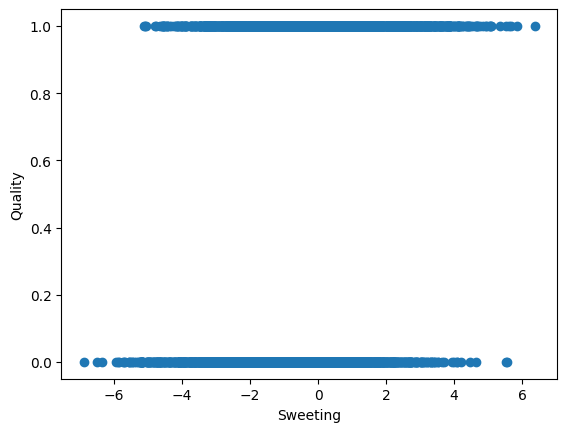

In [26]:
plt.scatter(data['Sweetness'],data['Quality'])
plt.xlabel('Sweeting')
plt.ylabel('Quality')

In [27]:
X = data.iloc[:, [3, 4]].values
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [34]:
 #Perform KMeans clustering with a chosen number of clusters (let's say 5)
kmeans = KMeans(n_clusters=3,n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)
y_kmeans

array([1, 0, 1, ..., 1, 1, 0], dtype=int32)

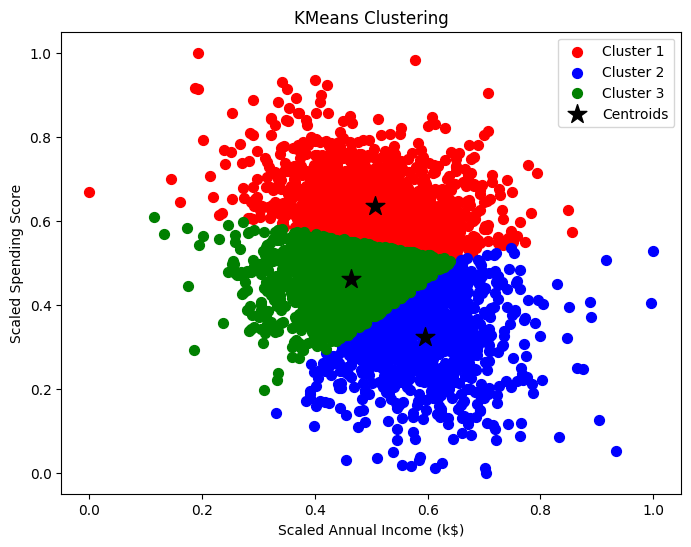

In [29]:
# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[y_kmeans == 0, 0], X_scaled[y_kmeans == 0, 1], s=50, c='red', label='Cluster 1')
plt.scatter(X_scaled[y_kmeans == 1, 0], X_scaled[y_kmeans == 1, 1], s=50, c='blue', label='Cluster 2')
plt.scatter(X_scaled[y_kmeans == 2, 0], X_scaled[y_kmeans == 2, 1], s=50, c='green', label='Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='*',
            label='Centroids')
plt.title('KMeans Clustering')
plt.xlabel('Scaled Annual Income (k$)')
plt.ylabel('Scaled Spending Score')
plt.legend()
plt.show()

In [30]:
data['cluster'] = y_kmeans
data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality,cluster
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,1.0,0
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,1.0,2
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,0.0,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,1.0,0
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,1.0,0
...,...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,0.0,0
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,1.0,2
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,0.0,0
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,1.0,0


In [31]:
kmeans.cluster_centers_

array([[0.50668203, 0.63458965],
       [0.5957641 , 0.32417524],
       [0.46394343, 0.46202492]])

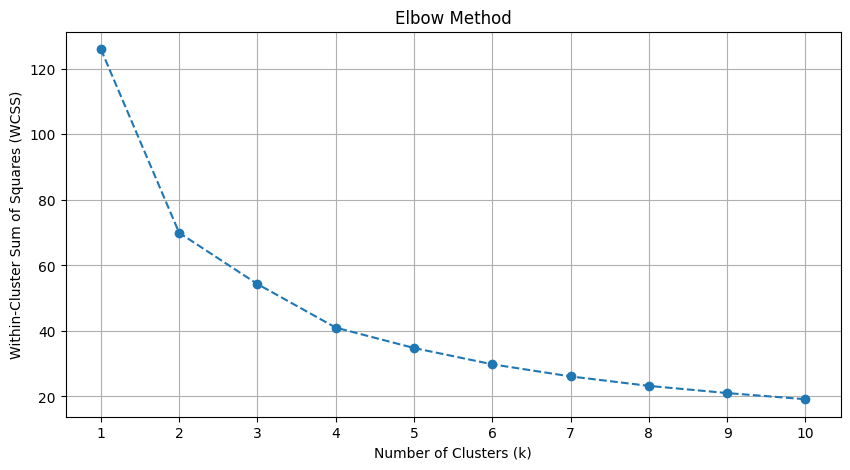

In [33]:
#Elbow Plot

wcss = []
max_clusters = 10  # maximum number of clusters to try
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i,n_init=10)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(10, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.show()

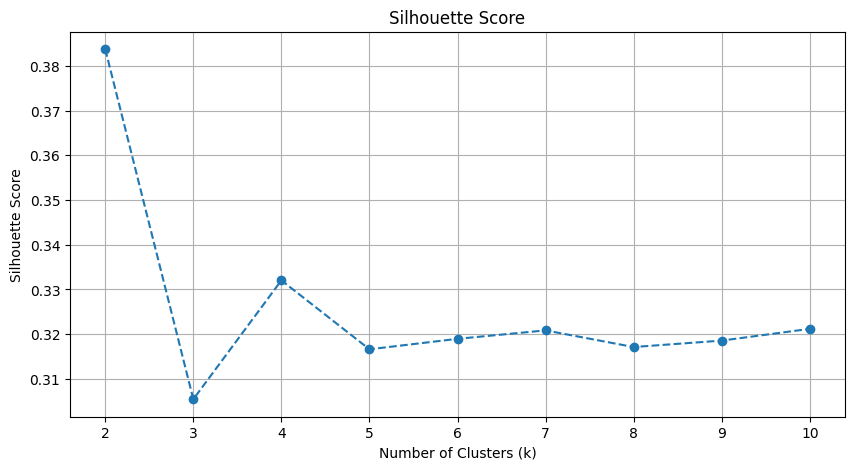

In [38]:

from sklearn.metrics import silhouette_score

silhouette_scores = []
max_clusters = 10  # maximum number of clusters to try
for i in range(2, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42,n_init=10)
    kmeans.fit(X_scaled)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot silhouette scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o', linestyle='--')
plt.title('Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

# 2.	Hierarchical Algorithm

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage

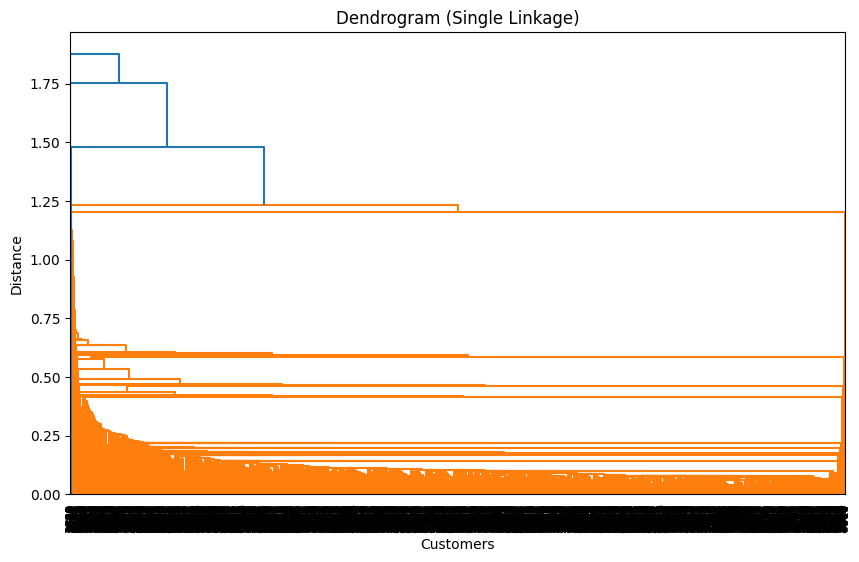

In [43]:
# Hierarchical clustering with single linkage
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='single'), leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

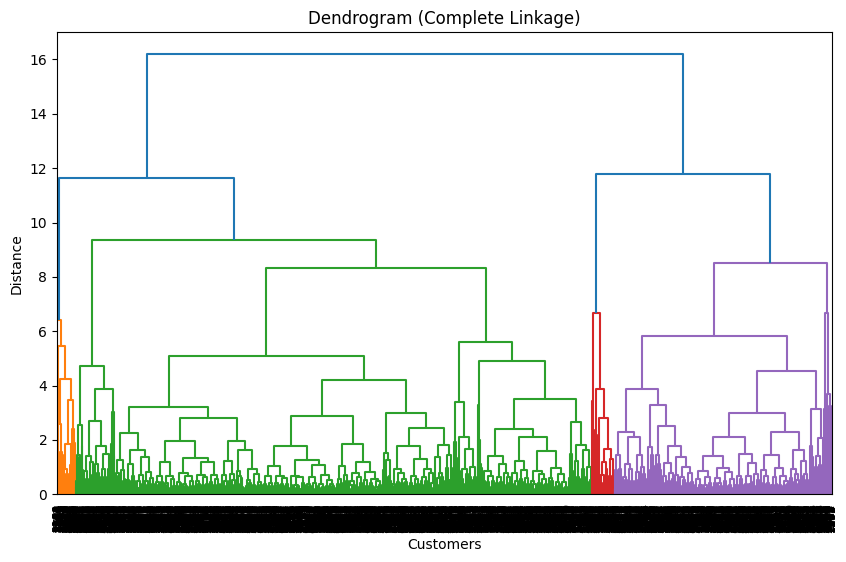

In [ ]:
# Hierarchical clustering with complete linkage
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='complete'), leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram (Complete Linkage)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

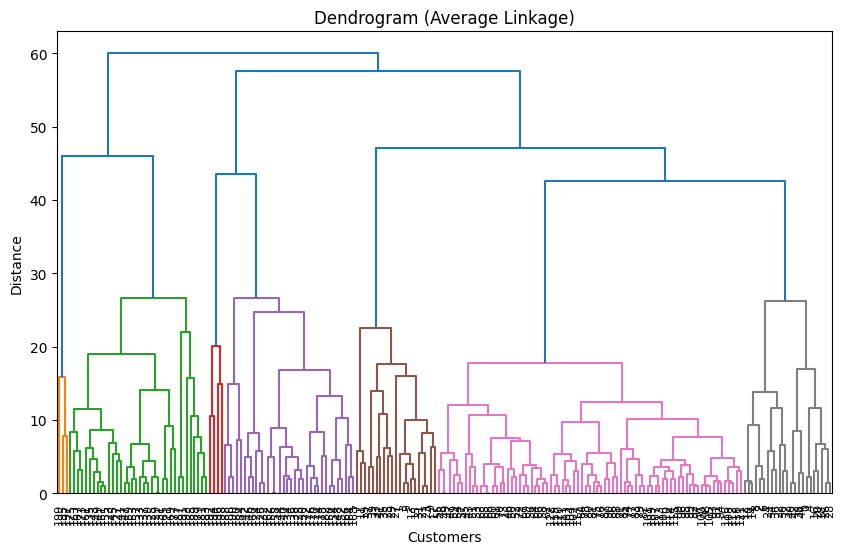

In [ ]:
# Hierarchical clustering with average linkage
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='average'), leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram (Average Linkage)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

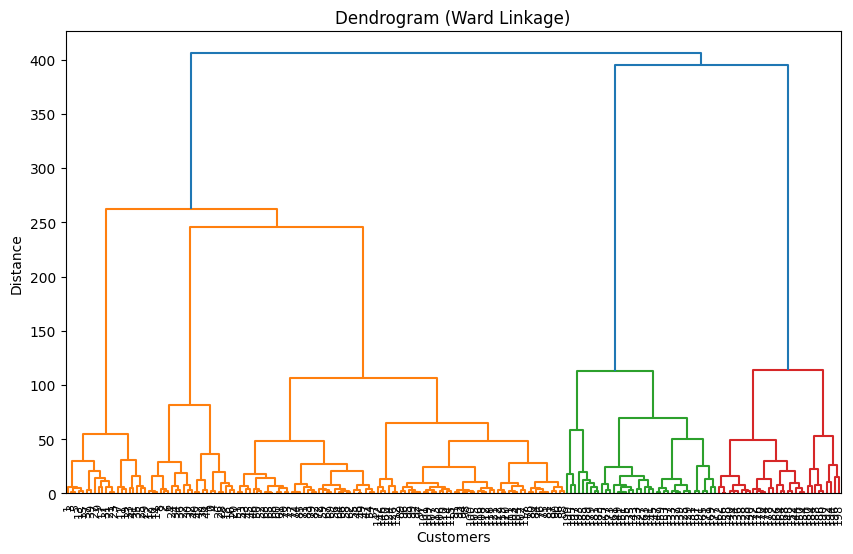

In [ ]:
# Hierarchical clustering with Ward linkage
plt.figure(figsize=(10, 6))
dendrogram(linkage(X, method='ward'), leaf_rotation=90, leaf_font_size=8)
plt.title('Dendrogram (Ward Linkage)')
plt.xlabel('Customers')
plt.ylabel('Distance')
plt.show()

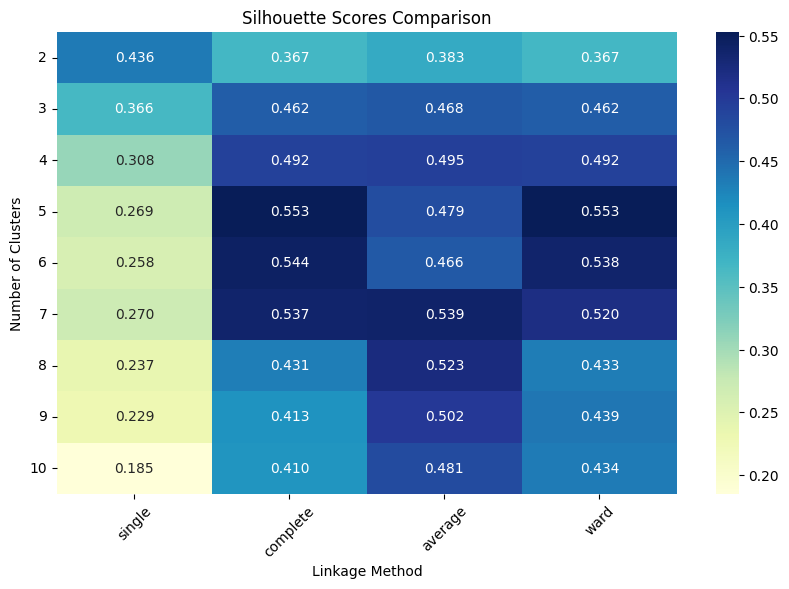

In [ ]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering

max_clusters = 10
clusters_range = range(2, max_clusters + 1)

# Define linkage methods
linkage_methods = ['single', 'complete', 'average', 'ward']

# Create a dataframe to store the results
results_df = pd.DataFrame(index=clusters_range, columns=linkage_methods)

# Calculate metrics for each linkage method and each number of clusters
for method in linkage_methods:
    for n_clusters in clusters_range:
        # Perform hierarchical clustering
        agglomerative = AgglomerativeClustering(n_clusters=n_clusters, linkage=method)
        cluster_labels = agglomerative.fit_predict(X)

        # Calculate silhouette score
        silhouette_avg = silhouette_score(X, cluster_labels)

        # Store silhouette score in the results dataframe
        results_df.at[n_clusters, method] = silhouette_avg

# Convert all values to float
results_df = results_df.astype(float)

# Plot the comparison table
plt.figure(figsize=(10, 6))
sns.heatmap(results_df, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title('Silhouette Scores Comparison')
plt.xlabel('Linkage Method')
plt.ylabel('Number of Clusters')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

# DBSCAN

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

data=mall_data[['Annual Income (k$)','Spending Score (1-100)']]

In [ ]:
dbscan = DBSCAN(eps=9, min_samples=3)
cluster_labels = dbscan.fit_predict(data)

mall_data['cluster_DBSCAN'] = cluster_labels
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),cluster,cluster_DBSCAN
0,1,Male,19,15,39,1,0
1,2,Male,21,15,81,1,1
2,3,Female,20,16,6,2,2
3,4,Female,23,16,77,1,1
4,5,Female,31,17,40,1,0


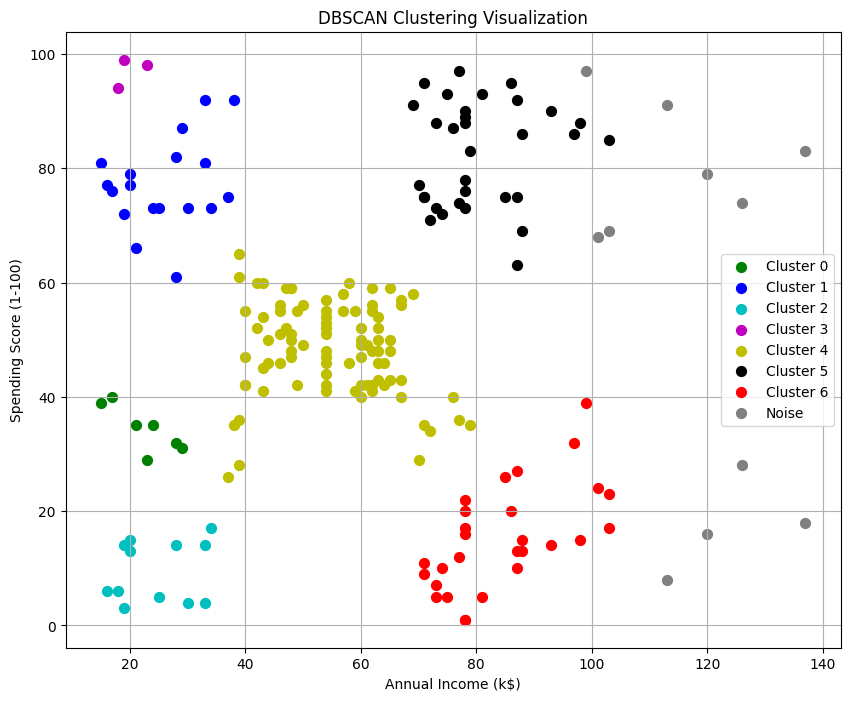

In [ ]:
# Plotting
plt.figure(figsize=(10, 8))

# Colors for each cluster
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k']

# Loop through clusters and plot data points
for cluster_label in set(cluster_labels):
    if cluster_label == -1:
        plt.scatter(mall_data.loc[mall_data['cluster_DBSCAN'] == cluster_label, 'Annual Income (k$)'],
                    mall_data.loc[mall_data['cluster_DBSCAN'] == cluster_label, 'Spending Score (1-100)'],
                    c='gray', s=50, label='Noise')
    else:
        plt.scatter(mall_data.loc[mall_data['cluster_DBSCAN'] == cluster_label, 'Annual Income (k$)'],
                   mall_data.loc[mall_data['cluster_DBSCAN'] == cluster_label, 'Spending Score (1-100)'],
                    c=colors[(cluster_label + 1) % len(colors)], s=50, label=f'Cluster {cluster_label}')

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering Visualization')
plt.legend()
plt.grid(True)
plt.show()

# Conclusion


1. **K-Means:**
    - K-Means is a centroid-based clustering algorithm that aims to partition data points into K pre-defined clusters.
    - It iteratively assigns data points to the nearest cluster centroid and updates the centroids until convergence.
    - In this analysis, K-Means was applied to the customer data based on two features: Age and Spending Score.
    - Three clusters were identified, represented by different colors in the scatter plot.
    - The elbow method was used to determine the optimal number of clusters by plotting the sum of squared errors (SSE) against the number of clusters.

2. **Hierarchical Clustering:**
    - Hierarchical clustering builds a hierarchy of clusters by iteratively merging or splitting data points based on their similarity.
    - In this analysis, agglomerative hierarchical clustering was performed on the scaled data using different linkage methods (ward, single, and complete).
    - Dendrograms were plotted to visualize the hierarchical relationships between data points.
    - The dendrograms helped in identifying potential cluster memberships and choosing the appropriate number of clusters.

3. **DBSCAN:**
    - DBSCAN is a density-based clustering algorithm that identifies clusters based on the density of data points in the neighborhood.
    - It requires two parameters: epsilon (eps) and minimum number of points (min_samples).
    - In this analysis, DBSCAN was applied to the customer data using eps=9 and min_samples=3.
    - The resulting clusters were visualized using different colors in a scatter plot.
    - The plot highlighted the core points (belonging to clusters), border points (on the edge of clusters), and noise points (not belonging to any cluster).

4. **Comparison of Clustering Algorithms:**
    - Each clustering algorithm has its strengths and weaknesses, and the choice of the best algorithm depends on the specific characteristics of the data and the desired outcome.
    - K-Means is simple and efficient, but it requires pre-defining the number of clusters.
    - Hierarchical clustering can reveal the hierarchical structure of the data, but it can be computationally expensive for large datasets.
    - DBSCAN is robust to noise and outliers, but it requires careful parameter tuning.

5. **Insights from Clustering:**
    - The clustering analysis revealed three distinct customer segments based on their spending habits and age.
    - These segments can be targeted with tailored marketing campaigns and promotions.
    - For example, Cluster 0 (green) represents younger customers with high spending scores, while Cluster 1 (red) represents older customers with low spending scores.

6. **Evaluation:**
    - The quality of the clustering results should be evaluated using appropriate metrics such as silhouette score or Davies-Bouldin index.
    - This helps in assessing the effectiveness of the chosen clustering algorithm and the chosen number of clusters.
